Name: Sunay Sanghani
USC ID: 5373536322
Email: sunaysan@usc.edu

In [103]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
!pip3 install xgboost
import xgboost as xgb
from sklearn import tree
import statsmodels.api as sm
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV

In [104]:
datapath_1 = "C:/Users/sunay/Downloads/DSCI552HW5/data/diagnosis_data.csv"
datapath_2 = "C:/Users/sunay/Downloads/DSCI552HW5/data/communities_data.csv"

In [105]:
def get_data_file_col_name(filename):
    if "diagnosis" in filename:
        return ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]

In [106]:
df = pd.read_csv(datapath_1, sep='\s+', encoding='UTF_16', header=None, decimal=',')
df.columns = get_data_file_col_name(datapath_1)
for col in df.columns:
    df.loc[df[col] == 'no', col] = 0
    df.loc[df[col] == 'yes', col] = 1
df

a1 a2 a3 a4 a5 a6 d1 d2
0    35.5  0  1  0  0  0  0  0
1    35.9  0  0  1  1  1  1  0
2    35.9  0  1  0  0  0  0  0
3    36.0  0  0  1  1  1  1  0
4    36.0  0  1  0  0  0  0  0
..    ... .. .. .. .. .. .. ..
115  41.4  0  1  1  0  1  0  1
116  41.5  0  0  0  0  0  0  0
117  41.5  1  1  0  1  0  0  1
118  41.5  0  1  1  0  1  0  1
119  41.5  0  1  1  0  1  0  1

[120 rows x 8 columns]

In [107]:
def train_decision_tree(trainX, trainY): 
    decision_tree = DecisionTreeClassifier(random_state = 69)
    model = decision_tree.fit(trainX, trainY)
    print("Text Representation:\n")
    print(tree.export_text(decision_tree))
    print("Decision Tree:\n")
    tree.plot_tree(decision_tree, filled = True)
    return decision_tree

In [108]:
trainX, trainY = df.iloc[:, :6], df.iloc[:, 6].astype('int')
decision_tree = train_decision_tree(trainX, trainY)

Text Representation:

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

Decision Tree:



Text Representation:

|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

Decision Tree:



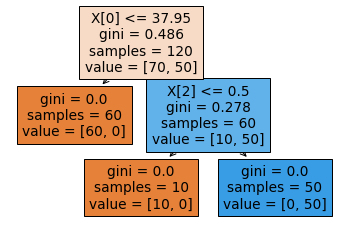

In [109]:
trainX, trainY = df.iloc[:, :6], df.iloc[:, 7].astype('int')
decision_tree = train_decision_tree(trainX, trainY)

In [110]:
trainX, trainY = df.iloc[:, :6], df.iloc[:, 6:].astype('int')
decision_tree = train_decision_tree(trainX, trainY)

Text Representation:

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0

Decision Tree:



In [112]:
def get_value_to_string(value):
    ans = "["
    for row in value:
        ans += ' ['
        for col in row:
            ans += str(col) + ' '
        ans = ans[:-1] + ']'
    ans += ' ]'
    return ans

def tree_to_code(decision_tree, features):
    decision_tree = decision_tree.tree_
    feature_names = [features[i] if i != _tree.TREE_UNDEFINED else "udf" for i in decision_tree.feature]
    print("def tree({}):".format(", ".join(features)))
    
    def recurse(node, depth):
        indent = "  " * depth
        if decision_tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[node]
            threshold = decision_tree.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(decision_tree.children_left[node], depth + 1)
            print(f"{indent}else:")
            recurse(decision_tree.children_right[node], depth + 1)
        else:
            print(f"{indent}return {get_value_to_string(decision_tree.value[node])}")

    recurse(0, 1)

In [113]:
features_names = ['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra']
tree_to_code(decision_tree, features_names)

def tree(temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, burning_urethra):
  if temperature <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [ [20.0 0.0] [20.0 0.0] ]
    else:
      return [ [0.0 40.0] [40.0 0.0] ]
  else:
    if lumbar_pain <= 0.5:
      return [ [10.0 0.0] [10.0 0.0] ]
    else:
      if micturition_pains <= 0.5:
        return [ [21.0 0.0] [0.0 21.0] ]
      else:
        if urine_pushing <= 0.5:
          return [ [10.0 0.0] [0.0 10.0] ]
        else:
          return [ [0.0 19.0] [0.0 19.0] ]


In [114]:
def get_alphas(trainX, trainY):
    decision_tree = DecisionTreeClassifier(random_state = 50)
    decision_tree.fit(trainX, trainY)
    return decision_tree.cost_complexity_pruning_path(trainX, trainY)['ccp_alphas']

Best ccp alpha value:  0.0


[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

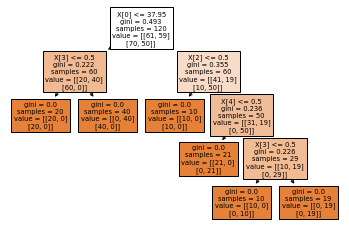

In [115]:
trainX, trainY = df.iloc[:, :6], df.iloc[:, 6:].astype('int')
ccp_alphas = get_alphas(trainX, trainY)

decision_tree = DecisionTreeClassifier(random_state = 50)
decision_tree = GridSearchCV(decision_tree, cv = 5, param_grid = {'ccp_alpha': ccp_alphas}, 
                       scoring = 'neg_mean_squared_error')
decision_tree.fit(trainX, trainY)
print("Best ccp alpha value: ", decision_tree.best_params_['ccp_alpha'])
decision_tree = DecisionTreeClassifier(ccp_alpha = decision_tree.best_params_['ccp_alpha'], random_state = 50)
decision_tree.fit(trainX, trainY)
tree.plot_tree(decision_tree, filled = True)

In [187]:
features_names = ['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra']
tree_to_code(decision_tree, features_names)

def tree(temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, burning_urethra):
  if temperature <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [ [20.0 0.0] [20.0 0.0] ]
    else:
      return [ [0.0 40.0] [40.0 0.0] ]
  else:
    if lumbar_pain <= 0.5:
      return [ [10.0 0.0] [10.0 0.0] ]
    else:
      if micturition_pains <= 0.5:
        return [ [21.0 0.0] [0.0 21.0] ]
      else:
        if urine_pushing <= 0.5:
          return [ [10.0 0.0] [0.0 10.0] ]
        else:
          return [ [0.0 19.0] [0.0 19.0] ]


# 2. The LASSO and Boosting Regression

# a) Obtain Data

In [194]:
def get_columns_from_file(filename):
    column_names = []
    file = open(filename)
    for line in file:
        if '@attribute' in line:
            line = line.split(" ")
            column_names.append(line[1])
    return column_names

In [195]:
df = pd.read_csv(datapath_2, header = None, na_values = '?')
df.columns = get_columns_crime_data('C:/Users/sunay/Downloads/DSCI552HW5/data/communities_names.txt')
df

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [196]:
train_data, test_data = df[:1495], df[1495:]
train_data

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1490      6     NaN        NaN     Hillsboroughtown     8        0.00   
1491      6     NaN        NaN           Orangecity     8        0.16   
1492     13     NaN        NaN         Waycrosscity     8        0.01   
1493     39    85.0    49056.0           Mentorcity     8        0.06   
1494     34    17.0    79610.0      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22        NaN            NaN                  NaN   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01        NaN            NaN                  NaN   
1493     0.15            0.02        NaN            NaN                  NaN   
1494     1.00            1.00       0.00           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1490                  NaN                 0.00              NaN   
1491                  0.5                 0.61             0.19   
1492                  NaN                 0.00              NaN   
1493                  NaN                 0.00              NaN   
1494                  0.0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

In [197]:
test_data

state  county  community      communityname  fold  population  \
1495      6     NaN        NaN     MillValleycity     8        0.00   
1496     48     NaN        NaN        LiveOakcity     8        0.00   
1497     35     NaN        NaN       Portalescity     8        0.00   
1498     42    17.0    25112.0      Fallstownship     8        0.04   
1499     51   683.0    48952.0       Manassascity     8        0.03   
...     ...     ...        ...                ...   ...         ...   
1989     12     NaN        NaN  TempleTerracecity    10        0.01   
1990      6     NaN        NaN        Seasidecity    10        0.05   
1991      9     9.0    80070.0      Waterburytown    10        0.16   
1992     25    17.0    72600.0        Walthamcity    10        0.08   
1993      6     NaN        NaN        Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
1495           0.20          0.03          0.91          0.23  ...      0.01   
1496           0.55          0.13          0.78          0.15  ...      0.01   
1497           0.52          0.04          0.59          0.05  ...      0.01   
1498           0.51          0.07          0.92          0.09  ...      0.06   
1499           0.59          0.20          0.75          0.19  ...      0.03   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
1495     0.23            0.73        NaN            NaN                  NaN   
1496     0.18            0.02        NaN            NaN                  NaN   
1497     0.18            0.00        NaN            NaN                  NaN   
1498     0.13            0.16        NaN            NaN                  NaN   
1499     0.23            0.06        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
1495                  NaN                 0.00              NaN   
1496                  NaN                 0.00              NaN   
1497                  NaN                 0.00              NaN   
1498                  NaN                 0.00              NaN   
1499                  NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
1495                 0.12  
1496                 0.11  
1497                 0.12  
1498                 0.06  
1499                 0.12  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[499 rows x 128 columns]

# b)

In [198]:
non_predictive_features = ['state', 'county', 'community', 'communityname', 'fold']
train_data = train_data.drop(columns = non_predictive_features)
test_data = test_data.drop(columns = non_predictive_features)
data = df.drop(columns = non_predictive_features)

In [199]:
columns_with_nan = data.isnull().sum().index[data.isnull().sum() > 0]
def impute(train_data, test_data):
    imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
    for col in columns_with_nan:
        imputer = imputer.fit(train_data[[col]])
        train_data[[col]] = imputer.transform(train_data[[col]])
        test_data[[col]] = imputer.transform(test_data[[col]])
    return pd.concat([train_data, test_data]), train_data, test_data

imputed_data, imputed_train_data, imputed_test_data = impute(train_data, test_data)
imputed_data

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163975       0.080502   
1990      0.02     0.37            0.20   0.163975       0.080502   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1989             0.713054             0.451883                 0.00   
1990             0.713054             0.451883                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1989         0.190753                 0.09  
1990         0.190753                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

# c)

In [129]:
correlation = imputed_data.corr()
correlation.style.background_gradient(cmap = 'coolwarm')

In [130]:
plt.figure(figsize = (55, 55))
sns.heatmap(correlation, cmap = "YlGnBu", annot = True)
plt.show()

# d)

In [131]:
cv_results = {} 
for col in imputed_data.columns:
    mu = imputed_data[col].mean()
    sigma = imputed_data[col].std()
    cv_results[col] = [mu, sigma, sigma/mu]
cv_results = pd.DataFrame(cv_results)
cv_results.index = ['mu', 'std', 'cv']
cv_results

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
mu     0.057593       0.463395      0.179629      0.753716      0.153681   
std    0.126906       0.163717      0.253442      0.244039      0.208877   
cv     2.203503       0.353298      1.410920      0.323782      1.359162   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
mu      0.144022     0.424218     0.493867     0.336264    0.423164  ...   
std     0.232492     0.155196     0.143564     0.166505    0.179185  ...   
cv      1.614278     0.365840     0.290693     0.495161    0.423442  ...   

     LandArea   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
mu   0.065231  0.232854        0.161685   0.163835       0.079895   
std  0.109459  0.203092        0.229055   0.085793       0.056023   
cv   1.678031  0.872187        1.416673   0.523655       0.701202   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
mu              0.710740             0.450052             0.094052   
std             0.085624             0.162153             0.240328   
cv              0.120471             0.360299             2.555266   

     PolicBudgPerPop  ViolentCrimesPerPop  
mu          0.191445             0.237979  
std         0.065815             0.232985  
cv          0.343782             0.979015  

[3 rows x 123 columns]

# e)

In [132]:
sort_index = np.argsort(cv_results.iloc[2])[::-1][:math.floor(math.sqrt(128))]
selected_columns = imputed_data.columns[sort_index]
print('Selected features:')
cv_results[selected_columns][2:].T

Selected features:


cv
NumStreet            4.407702
NumInShelters        3.485481
NumIlleg             2.994196
NumImmig             2.900497
LemasPctOfficDrugUn  2.555266
NumUnderPov          2.304970
population           2.203503
numbUrban            2.001744
HousVacant           1.958780
LandArea             1.678031
racePctHisp          1.614278

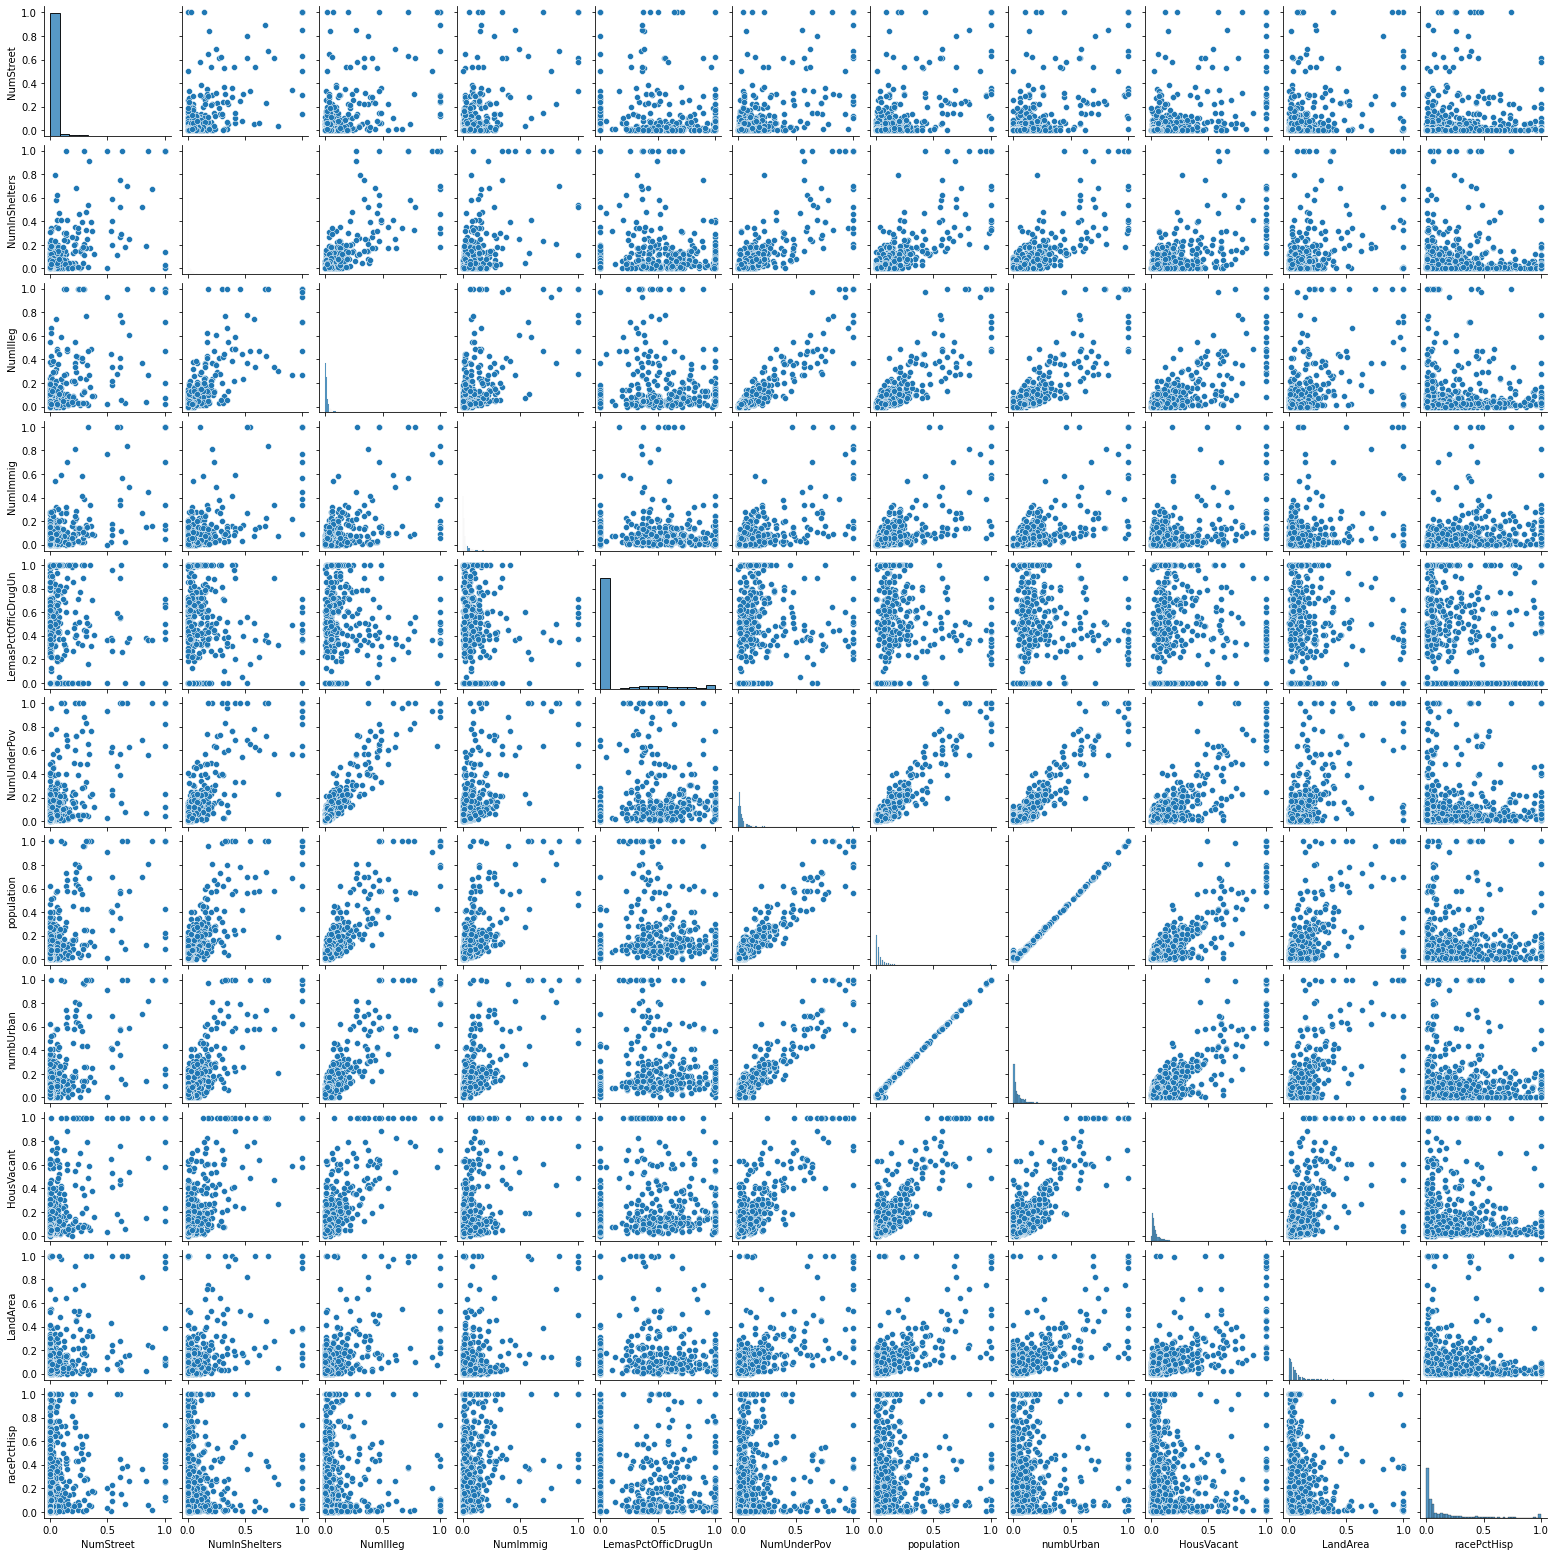

In [133]:
sns.pairplot(data = imputed_data[selected_columns], height = 2)

In [134]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(selected_columns):
    plt.subplot(int(len(selected_columns)/2) + 1, 2, i + 1)
    sns.boxplot(x = col, data = imputed_data)
plt.subplots_adjust(wspace = 0.2, hspace = 0.6)

Findings:
1) The scatterplots are extremely skewed and no conclusions can be drawn. Further testing must be done.

# f)

In [136]:
train_x, train_y = imputed_train_data.iloc[:, :-1], imputed_train_data.iloc[:, -1:]
test_x, test_y = imputed_test_data.iloc[:, :-1], imputed_test_data.iloc[:, -1:]

train_x = sm.add_constant(train_x)
model = sm.OLS(train_y, train_x).fit()
print(model.summary())

pred_train_y = model.predict(train_x)
mse_train = round(mean_squared_error(train_y, pred_train_y), 5)

test_x = sm.add_constant(test_x)
pred_test_y = model.predict(test_x)
mse_test = round(mean_squared_error(test_y, pred_test_y), 5)

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Fri, 27 Oct 2023   Prob (F-statistic):          6.56e-291
Time:                         00:08:42   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
print("Training MSE: {}".format(mse_train))
print("Testing MSE : {}".format(mse_test))

Training MSE: 0.01631
Testing MSE : 0.01814


In [138]:
def lasso_ridge(train_x, train_y, test_x, test_y, is_std = False, is_ridge = False): 
    
    alphas = [10**i for i in range(-10, 10)]
    if is_ridge:
        model = RidgeCV(cv = KFold(n_splits = 5, random_state = 50, shuffle = True))
    else:
        model = LassoCV(cv = KFold(n_splits = 5, random_state = 50, shuffle = True))
    
    if (is_std):
        scaler = StandardScaler()
        train_x = scaler.fit_transform(train_x)
        test_x = scaler.fit_transform(test_x)
        
    model.fit(train_x, train_y)
    
    pred_test_y = model.predict(test_x)
    best_alpha = model.alpha_
    mse_test = round(mean_squared_error(test_y, pred_test_y), 5)

    print("Best Alpha (lambda): {}".format(best_alpha))
    print("Test MSE           : {}".format(mse_test))
    return model

In [139]:
model = lasso_ridge(train_x, train_y, test_x, test_y, is_ridge = True)

Best Alpha (lambda): 1.0
Test MSE           : 0.01773


# h)

In [140]:
def get_selected_features(model, features):
    selected_features = []
    for i in range(len(features)):
        if (model.coef_[i] != 0):
            selected_features.append([features[i], model.coef_[i]])
    return selected_features

In [141]:
model = lasso_ridge(train_x, train_y, test_x, test_y)
selected_features = get_selected_features(model, train_x.columns)
print("\nTotal selected feature: {}".format(len(selected_features)))
selected_features

C:\Users\sunay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Alpha (lambda): 9.421060424823093e-05
Test MSE           : 0.0178

Total selected feature: 78


C:\Users\sunay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00832620177789778, tolerance: 0.006959374205685619
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sunay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01010514402108953, tolerance: 0.006959374205685619
  model = cd_fast.enet_coordinate_descent_gram(


[['racepctblack', 0.2733956521512126],
 ['racePctAsian', -0.01867534079231995],
 ['agePct12t21', 0.07903300380532406],
 ['agePct12t29', -0.3000594636937205],
 ['agePct65up', 0.005874478335866825],
 ['pctUrban', 0.04121588729265739],
 ['pctWWage', -0.09621516487475108],
 ['pctWFarmSelf', 0.029991475226671484],
 ['pctWInvInc', -0.11446327312435649],
 ['pctWSocSec', 0.06248285967928957],
 ['pctWPubAsst', 0.04319686553289895],
 ['pctWRetire', -0.11028468782489487],
 ['whitePerCap', -0.07374673344489036],
 ['blackPerCap', -0.023118022693303167],
 ['indianPerCap', -0.03223159747940752],
 ['AsianPerCap', 0.029330630177399897],
 ['OtherPerCap', 0.024019511001172052],
 ['HispPerCap', 0.026225557917160955],
 ['PctPopUnderPov', -0.15368755744835258],
 ['PctLess9thGrade', -0.022307225000511407],
 ['PctBSorMore', 0.02393921228331645],
 ['PctEmploy', 0.16138079048997284],
 ['PctEmplManu', -0.020493090605291676],
 ['PctOccupManu', 0.018995480901955204],
 ['MalePctDivorce', 0.13794150863654198],
 ['Ma

In [142]:
model = lasso_ridge(train_x, train_y, test_x, test_y, is_std = True)
selected_features = get_selected_features(model, train_x.columns)
print("\nTotal selected feature: {}".format(len(selected_features)))
selected_features

C:\Users\sunay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sunay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00927685233464004, tolerance: 0.006959374205685619
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sunay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010111437149745939, tolerance: 0.006959374205685619
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sunay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did 

Best Alpha (lambda): 0.0007116541214377484
Test MSE           : 0.01801

Total selected feature: 73


[['racepctblack', 0.06858870925793548],
 ['racePctAsian', -0.001360628476772045],
 ['agePct12t21', 0.011291618767082671],
 ['agePct12t29', -0.04022167456759961],
 ['pctUrban', 0.016802473042178186],
 ['pctWWage', -0.013003159360660405],
 ['pctWFarmSelf', 0.004377856493284314],
 ['pctWInvInc', -0.021216410951677686],
 ['pctWSocSec', 0.009385458078625303],
 ['pctWPubAsst', 0.006704066693141961],
 ['pctWRetire', -0.01750392150278842],
 ['whitePerCap', -0.009487391421876514],
 ['blackPerCap', -0.0037525679590309498],
 ['indianPerCap', -0.005283808296876053],
 ['AsianPerCap', 0.00538214087592416],
 ['OtherPerCap', 0.0038952119702655133],
 ['HispPerCap', 0.004205662721913283],
 ['PctPopUnderPov', -0.027938158086610432],
 ['PctLess9thGrade', -0.0025347261648514183],
 ['PctEmploy', 0.02265654343113571],
 ['PctEmplManu', -0.0012749096237330262],
 ['MalePctDivorce', 0.019941068973786665],
 ['MalePctNevMarr', 0.022100135698349677],
 ['FemalePctDiv', -0.011719460251362092],
 ['PctKids2Par', -0.040

Findings: The non standardized data has a lower mse than the test data set. It may prove to be better

# i) Fit a PCR model

In [143]:
def pcr_model(train_x, train_y, test_x, test_y):
    
    result_scores = []
    for i in range(1, 1 + len(train_x.columns)):
        model_pca = PCA(n_components = i)
        model_lr = LinearRegression(fit_intercept = True)    
        scores = cross_val_score(make_pipeline(model_pca, model_lr), train_x, train_y,
                                 cv = KFold(5, shuffle = True, random_state = 50), 
                                 n_jobs = -1, scoring = "neg_mean_squared_error")
        result_scores.append(round(sum(abs(scores))/len(scores), 5))
    return result_scores

In [144]:
scores = pcr_model(train_x, train_y, test_x, test_y)

In [145]:
minimum_error = scores[np.argmin(scores)]
components = np.argmin(scores) + 1

model_pca = PCA(n_components = components).fit(train_x)
pca_train = model_pca.transform(train_x)
pca_test = model_pca.transform(test_x)
model_lr = LinearRegression().fit(pca_train, train_y)
pred_test_y = model_lr.predict(pca_test)
mse_test = round(mean_squared_error(test_y, pred_test_y), 5)  

print("Miminum CV Training Error: {}".format(minimum_error))
print("Selected component       : {}".format(components))
print("Testing MSE              : {}".format(mse_test))

Miminum CV Training Error: 0.01946
Selected component       : 94
Testing MSE              : 0.01852


# j)

In [146]:
def boosting_tree(train_x, train_y, test_x, test_y):
    result_scores = []
    alphas = [i for i in range(0, 100)]
    for alpha in alphas:
        model = xgb.XGBRegressor(reg_alpha = alpha, random_state = 50)
        score = cross_val_score(model, train_x, train_y,
                              cv = KFold(5, shuffle = True, random_state = 50),
                              n_jobs = -1, scoring = "neg_mean_squared_error")
        result_scores.append(round(sum(abs(score))/len(score), 5))
    return result_scores, alphas

In [147]:
result_scores, alphas = boosting_tree(train_x, train_y, test_x, test_y)

In [148]:
minimum_error = result_scores[np.argmin(result_scores)]
best_alpha = alphas[np.argmin(result_scores)]

model = xgb.XGBRegressor(reg_alpha = best_alpha, random_state = 50)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
mse_test = round(mean_squared_error(test_y, pred_test_y), 5)

print("Miminum CV Training Error: {}".format(minimum_error))
print("Best Alpha (Lambda)      : {}".format(best_alpha))
print("Testing MSE              : {}".format(mse_test))

Miminum CV Training Error: 0.02061
Best Alpha (Lambda)      : 2
Testing MSE              : 0.01861
